[*********************100%%**********************]  13 of 13 completed


5-Year Performance Summary:
        Annualized Return  Annualized Volatility  Correlation with S&P 500
Ticker                                                                    
PWR             40.535327              35.438598                  0.649174
GE              19.078057              42.961874                  0.574436
AME             17.302080              28.188845                  0.819556
SO              17.002099              26.252757                  0.567968
NEE             15.300353              27.647457                  0.597432
EXC             12.795714              28.228164                  0.651053
EMR             12.269917              32.281240                  0.731071
NRG             10.192739              35.622049                  0.561607
AEP              8.763243              23.978120                  0.503676
CNP              8.702782              32.072197                  0.604485
D               -0.068126              26.756139                  0.5270

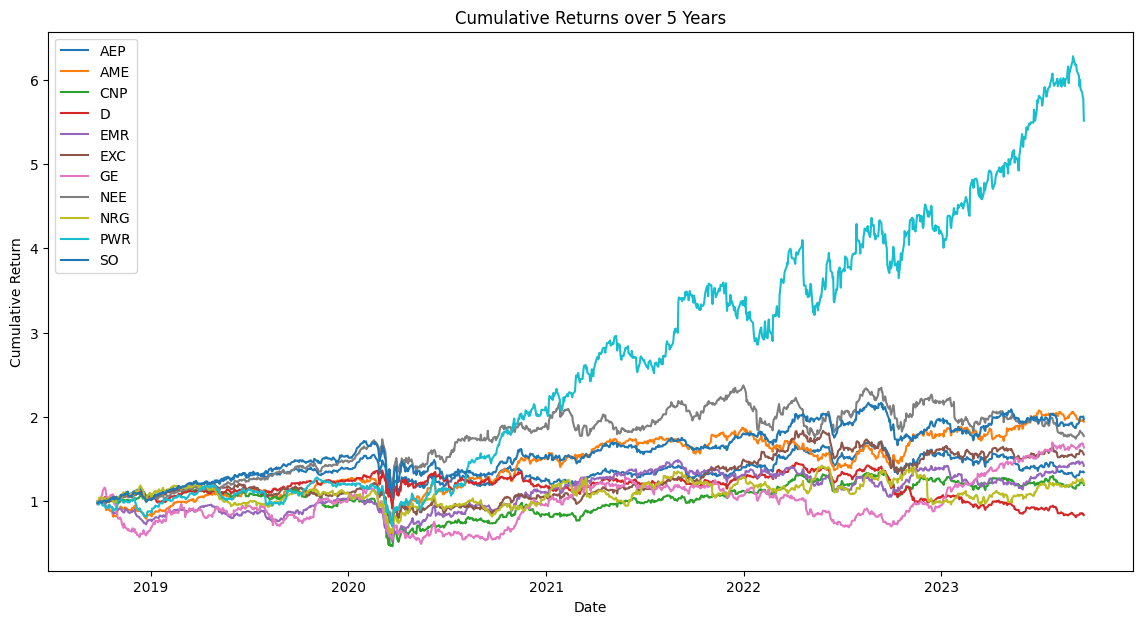

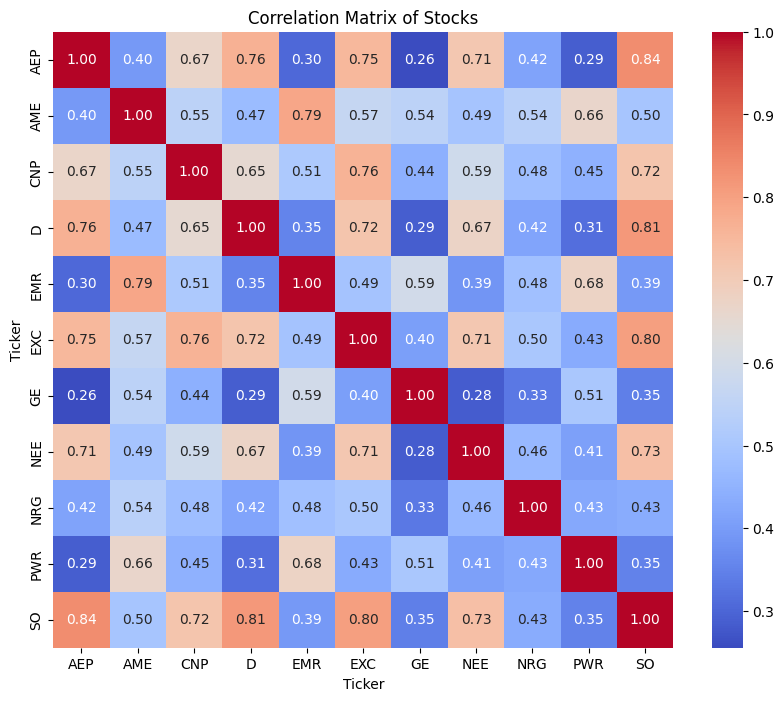

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of ticker symbols
tickers = ['GE', 'NEE', 'EMR', 'PWR', 'AME', 'D', 'NRG', 'CNP', 'AEP', 'SO', 'EXC', 'CEG', '^GSPC']  # '^GSPC' is the S&P 500 index

# Download historical data for the past 5 years
data = yf.download(tickers, start='2018-09-22', end='2023-09-22')['Adj Close']

# Drop any columns with NaN values
data = data.dropna(axis=1)

# Calculate daily returns
returns = data.pct_change().dropna()

# Annualized Return
annualized_return = returns.mean() * 252

# Annualized Volatility
annualized_volatility = returns.std() * np.sqrt(252)

# Calculate the correlation with the S&P 500
sp500_returns = returns['^GSPC']
correlations = returns.corrwith(sp500_returns)

# Create a summary dataframe
summary = pd.DataFrame({
    'Annualized Return': annualized_return * 100,
    'Annualized Volatility': annualized_volatility * 100,
    'Correlation with S&P 500': correlations
})

# Remove the S&P 500 index from the summary
summary = summary.drop('^GSPC')

# Sort the summary by Annualized Return
summary = summary.sort_values(by='Annualized Return', ascending=False)

# Print the summary
print("5-Year Performance Summary:")
print(summary)

# Plot cumulative returns
cumulative_returns = (1 + returns).cumprod()
cumulative_returns = cumulative_returns.drop(columns=['^GSPC'])  # Exclude S&P 500 for clarity

plt.figure(figsize=(14, 7))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns over 5 Years')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
corr_matrix = returns.drop(columns=['^GSPC']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Stocks')
plt.show()


[*********************100%%**********************]  13 of 13 completed


Performance Summary from 2022-03-01 to 2023-09-22:
        Annualized Return (%)  Annualized Volatility (%)  Sharpe Ratio  \
Ticker                                                                   
AEP                 -1.886863                  22.285688     -0.174411   
AME                 14.155789                  22.151578      0.548755   
CEG                 61.555893                  37.588575      1.584415   
CNP                  8.234730                  21.647874      0.288007   
D                  -25.555960                  23.215191     -1.186980   
EMR                 10.236235                  24.978386      0.329734   
EXC                  3.115369                  23.216470      0.048042   
GE                  33.910982                  30.325715      1.052275   
NEE                 -3.727217                  26.053091     -0.219829   
NRG                 11.891666                  33.731506      0.293247   
PWR                 40.219782                  31.997511     

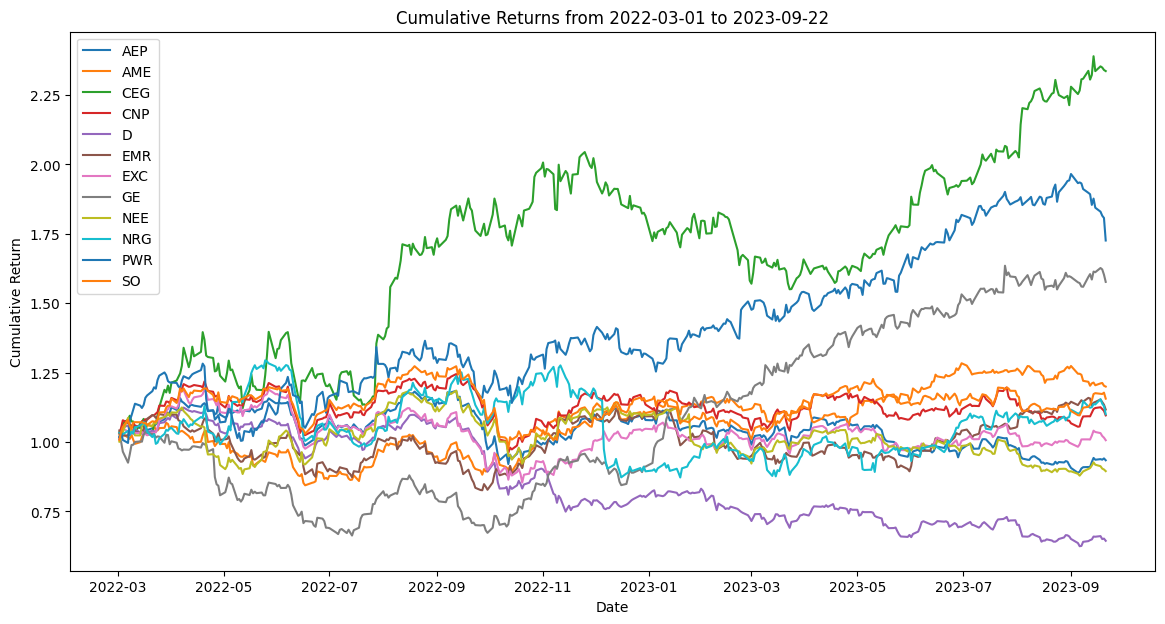

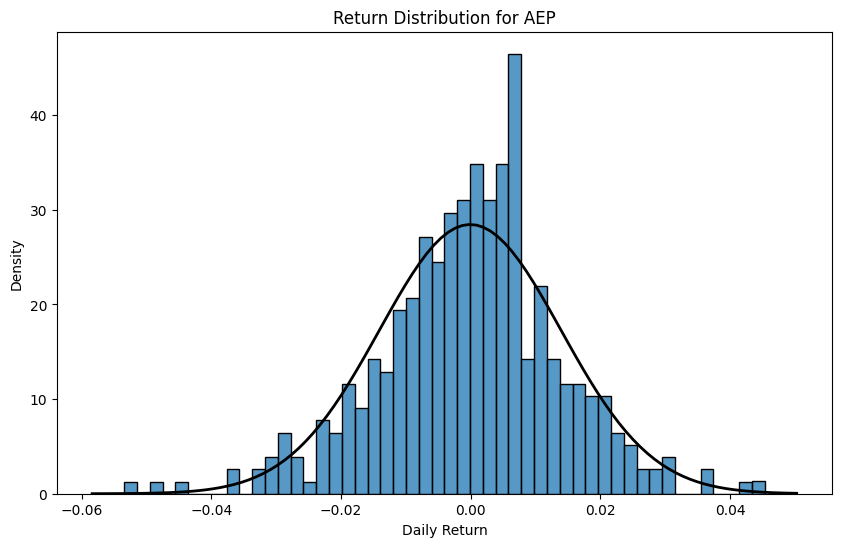

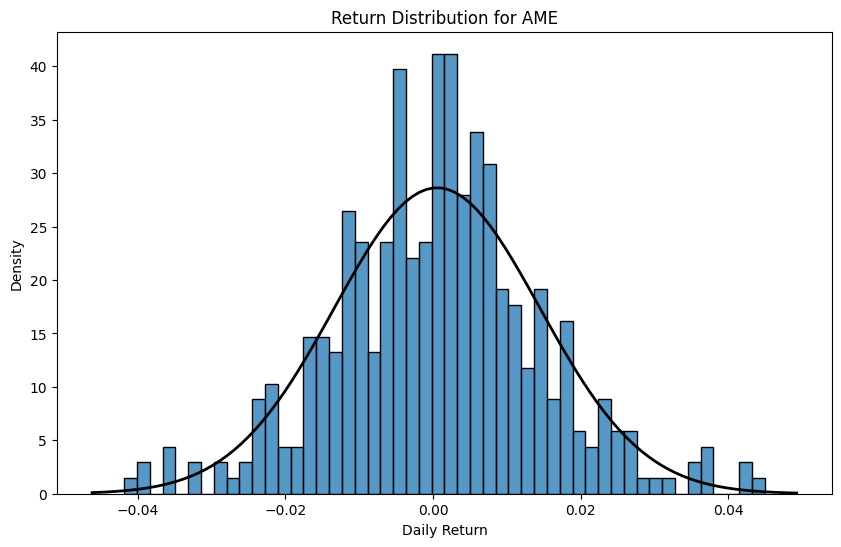

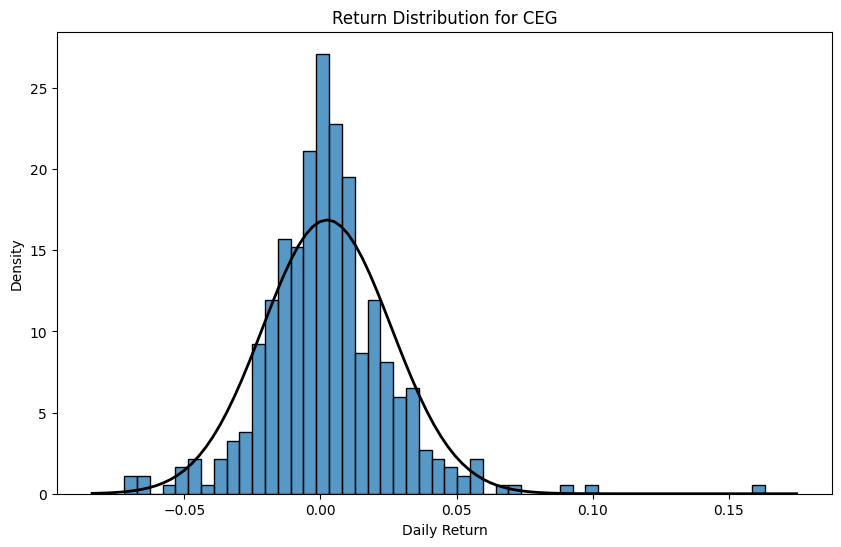

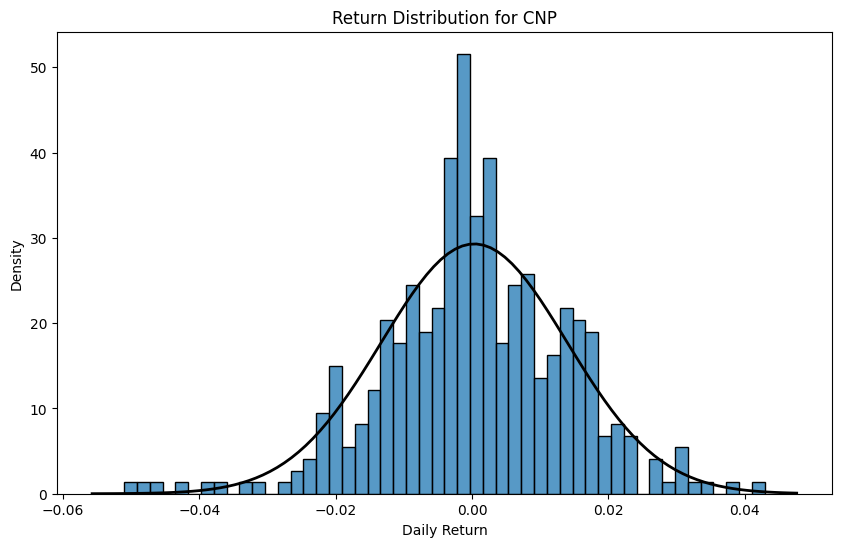

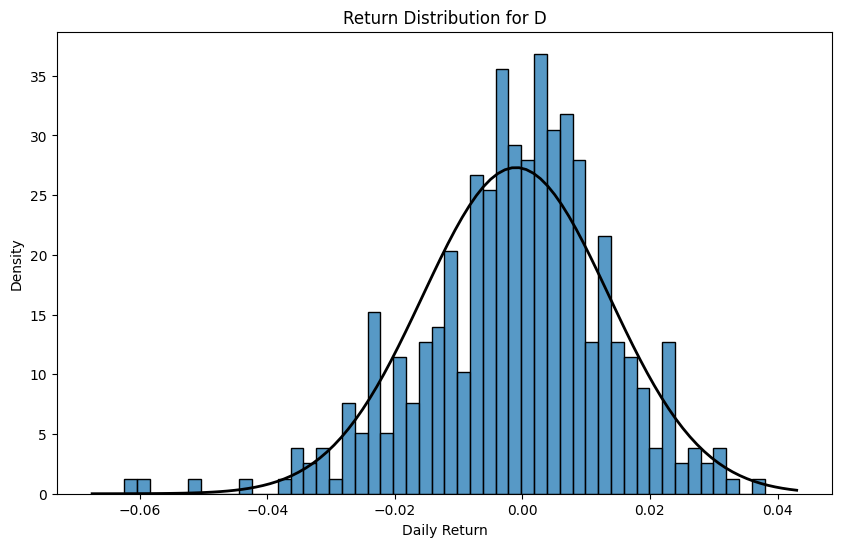

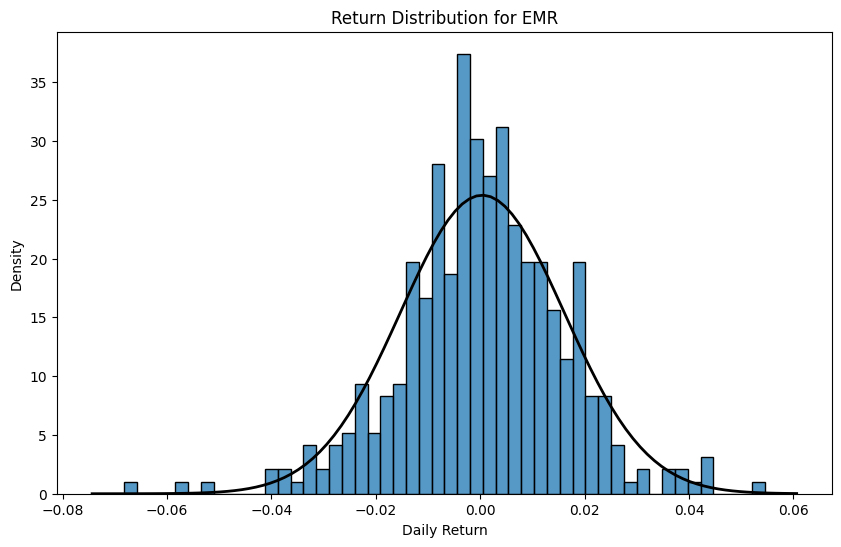

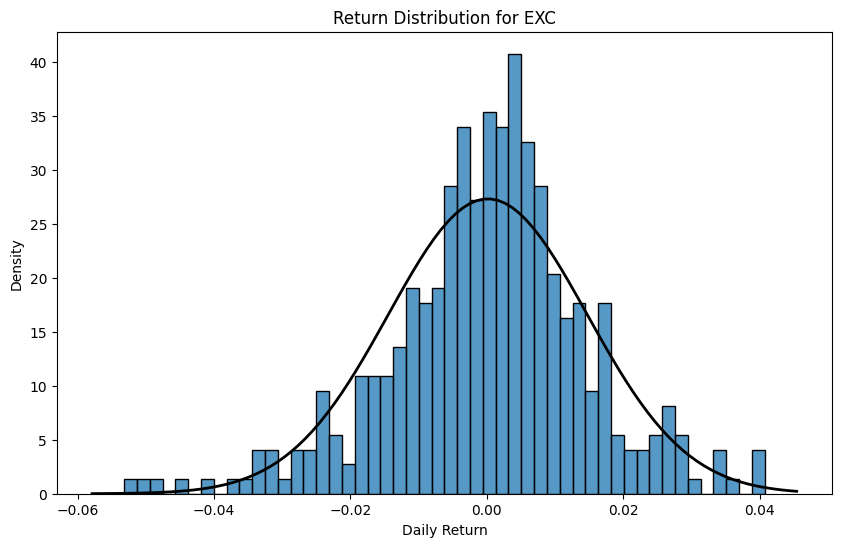

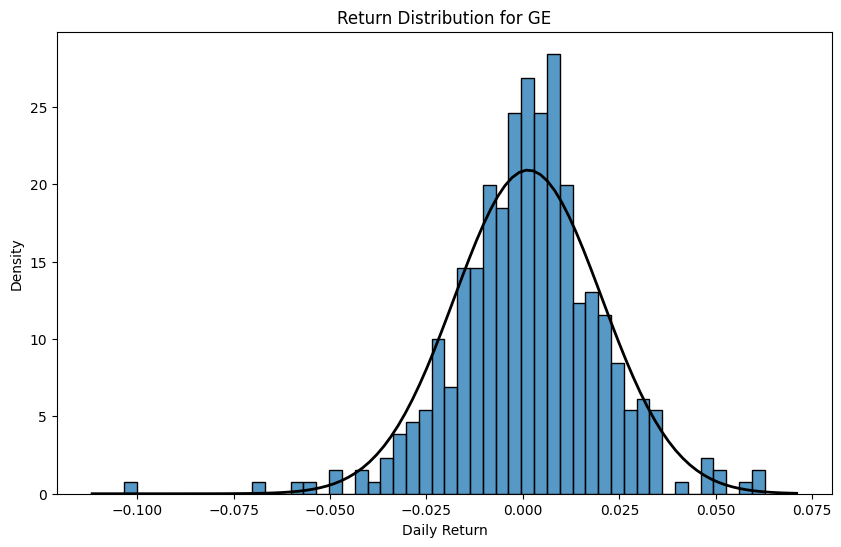

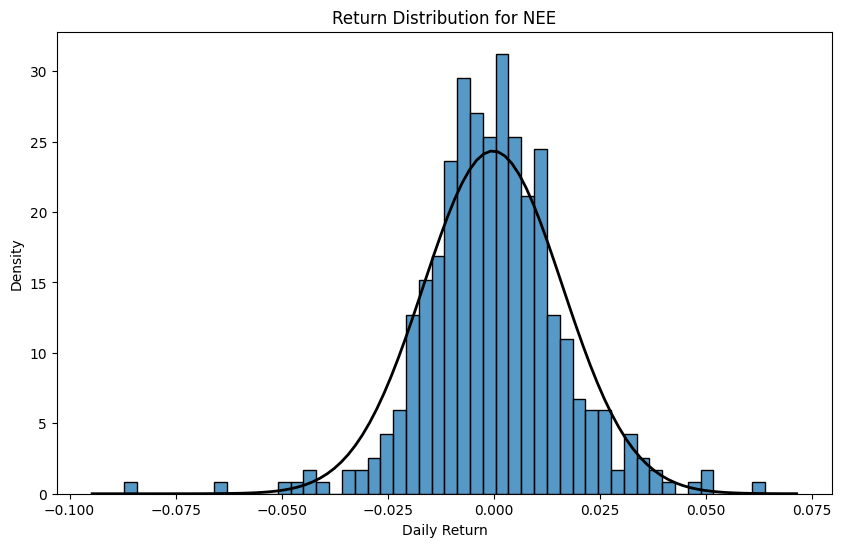

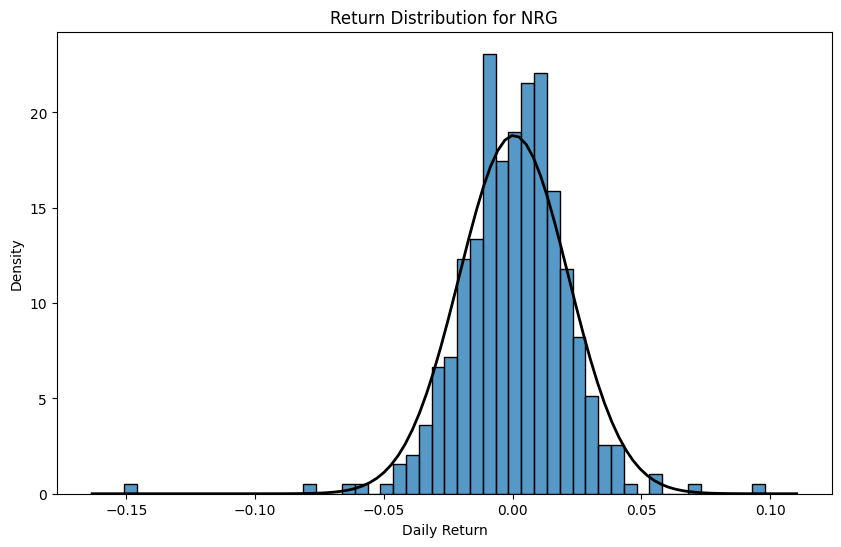

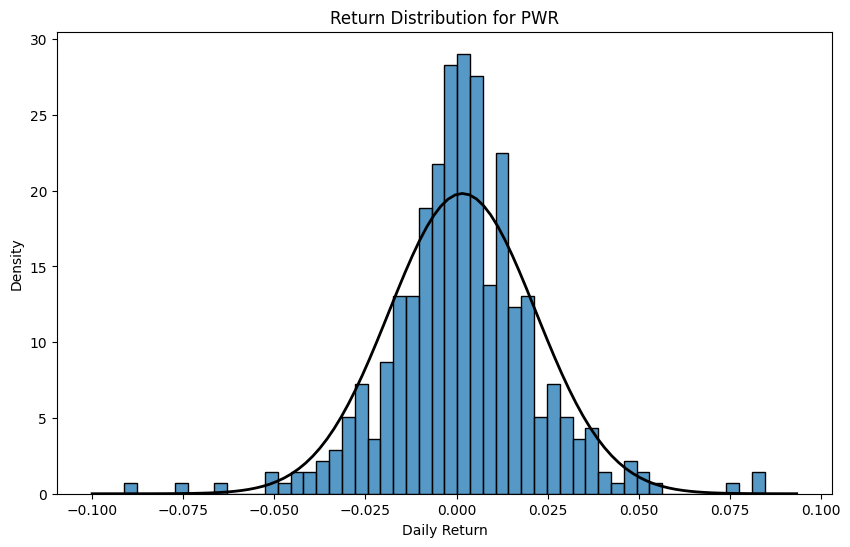

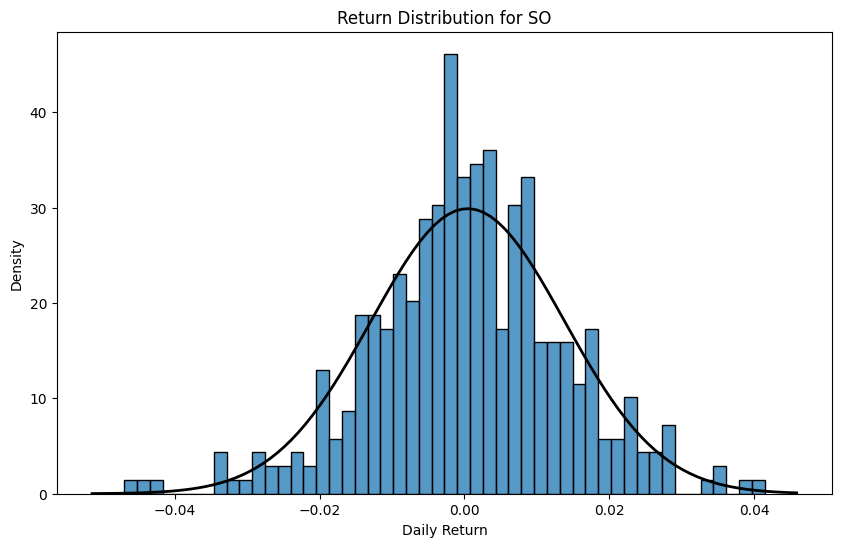

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# List of ticker symbols, including S&P 500 index
tickers = ['GE', 'NEE', 'EMR', 'PWR', 'AME', 'D', 'NRG', 'CNP', 'AEP', 'SO', 'EXC', 'CEG', '^GSPC']

# Adjust the start date to include CEG (March 1, 2022)
data = yf.download(tickers, start='2022-03-01', end='2023-09-22')['Adj Close']

# Drop any columns with NaN values
data = data.dropna(axis=1)

# Calculate daily returns
returns = data.pct_change().dropna()

# Risk-free rate (assumed, e.g., 2% annualized)
risk_free_rate = 0.02

# Number of trading days per year
trading_days = 252

# Annualized Return
annualized_return = returns.mean() * trading_days

# Annualized Volatility
annualized_volatility = returns.std() * np.sqrt(trading_days)

# Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Sortino Ratio (using downside deviation)
downside_returns = returns.copy()
downside_returns[downside_returns > 0] = 0
downside_deviation = downside_returns.std() * np.sqrt(trading_days)
sortino_ratio = (annualized_return - risk_free_rate) / downside_deviation

# Correlation with S&P 500
sp500_returns = returns['^GSPC']
correlations = returns.corrwith(sp500_returns)

# Create a summary dataframe
summary = pd.DataFrame({
    'Annualized Return (%)': annualized_return * 100,
    'Annualized Volatility (%)': annualized_volatility * 100,
    'Sharpe Ratio': sharpe_ratio,
    'Sortino Ratio': sortino_ratio,
    'Correlation with S&P 500': correlations
})

# Remove the S&P 500 index from the summary
# summary = summary.drop('^GSPC')

# Print the summary
print("Performance Summary from 2022-03-01 to 2023-09-22:")
print(summary)

# Distribution fitting and normality test
print("\nNormality Test (Shapiro-Wilk Test) p-values:")
for ticker in returns.columns:
    stat, p_value = stats.shapiro(returns[ticker])
    print(f"{ticker}: p-value = {p_value}")

# Plot cumulative returns
cumulative_returns = (1 + returns).cumprod()
cumulative_returns = cumulative_returns.drop(columns=['^GSPC'])  # Exclude S&P 500 for clarity

plt.figure(figsize=(14, 7))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns from 2022-03-01 to 2023-09-22')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Plot histograms of returns with fitted normal distribution
for ticker in returns.columns:
    if ticker != '^GSPC':
        plt.figure(figsize=(10, 6))
        sns.histplot(returns[ticker], bins=50, kde=False, stat='density')
        # Fit a normal distribution
        mu, std = stats.norm.fit(returns[ticker])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        plt.title(f'Return Distribution for {ticker}')
        plt.xlabel('Daily Return')
        plt.ylabel('Density')
        plt.show()
